Programa para calcular la distancia entre dos trayectorias infinitesimalmente cercanas en el espacio de fases del péndulo doble, y realizar un ajuste lineal que permita calcular los exponentes de Lyapunov

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import scipy.stats
import math

#importación de los datos
pend1data = np.loadtxt("pend1.txt") #datos del ángulo y su velocidad angular (masa a elegir)
pend2data = np.loadtxt("pend2.txt")
ang1 = pend1data[:,0]
vang1 = pend1data[:,1]
ang2 = pend2data[:,0]
vang2 = pend2data[:,1]

tmax = 50
t = np.linspace(0,tmax,tmax*10) #tiempo desde 0 a tmax con h=0.1

Calculamos la distancia entre las trayectorias

In [2]:
Zt = [0]*(tmax*10)
for i in range(tmax*10):
    Zt[i] = math.sqrt(pow(ang1[i]-ang2[i],2)+pow(vang1[i]-vang2[i],2))

Realizamos el ajuste lineal

a= 0.21889497889856346
error_a= 1.396608400090932e-05
R^2= 0.01709908039255148


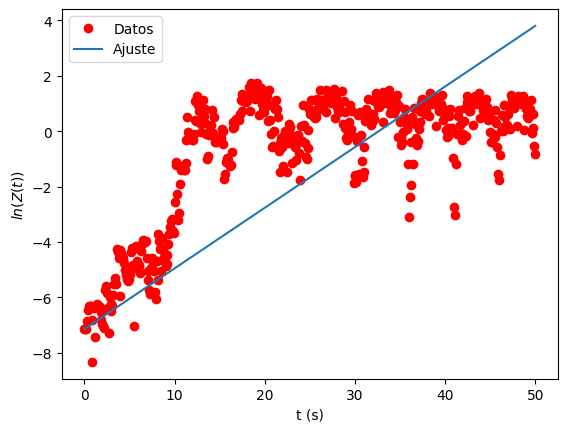

In [3]:
Z_ini = Zt[0]
#definimos funcion del ajuste
def func(x,a):
    return a*x+np.log(Z_ini)

#datos del ajuste
xdata = t
ydata = np.log(Zt)

#hacemos el ajuste
popt, pcov =curve_fit(func, xdata, ydata) 
#popt calcula los parámetros del ajuste 
#pcov estima la varianza de los parámetros. La diagonal proporciona la varianza de los parámetros estimados

#calculamos R^2
residuals = ydata- func(xdata, *popt)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((ydata-np.mean(ydata))**2)
r_squared = 1 - (ss_res / ss_tot)

#ploteamos el ajuste
plt.plot(xdata, ydata, 'ro', label='Datos') 
plt.plot(xdata, func(xdata, *popt), label='Ajuste')

#imprimimos los datos del ajuste
print("a=",popt[0])
print("error_a=",pcov[0,0])
print("R^2=",r_squared)

plt.xlabel('t (s)')
plt.ylabel('$ln(Z(t))$')
plt.legend()